In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Social_Network_Ads.csv")

In [114]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [115]:
df=df.iloc[:,2:]

In [116]:
df.sample(5)

,Age,EstimatedSalary,Purchased
121,37,72000,0
62,23,66000,0
191,19,26000,0
107,27,89000,0
214,47,43000,0


# Train test split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3, random_state=0)
X_train.shape,X_test.shape


((280, 2), (120, 2))

# Standard Scaler

In [119]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# # fit the scaler to train set, it will learn the parameters
# scaler.fit(X_train) #Finds the mean
# X_train_scaled=scaler.transform(X_train) # Sub the mean in the formula
# X_test_scaled=scaler.transform(X_test)

In [120]:
X_test.shape

(120, 2)

In [121]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [122]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [123]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [124]:
y_train

,Purchased
92,0
223,1
234,0
232,1
377,0
...,...
323,1
192,0
117,0
47,0


In [125]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [126]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [127]:
X_train_scaled #After converting to data Frame

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [128]:
X_test_scaled.shape

(120, 2)

In [129]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [130]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


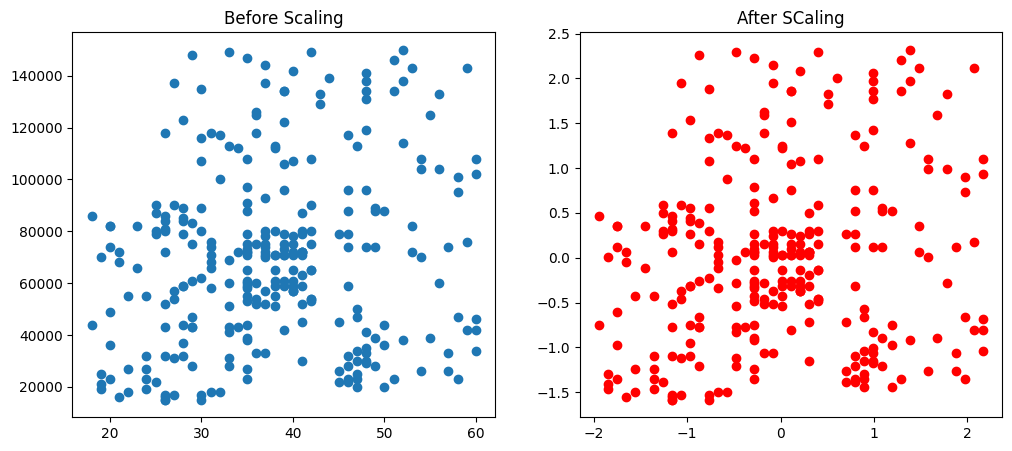

In [131]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After SCaling")
plt.show()

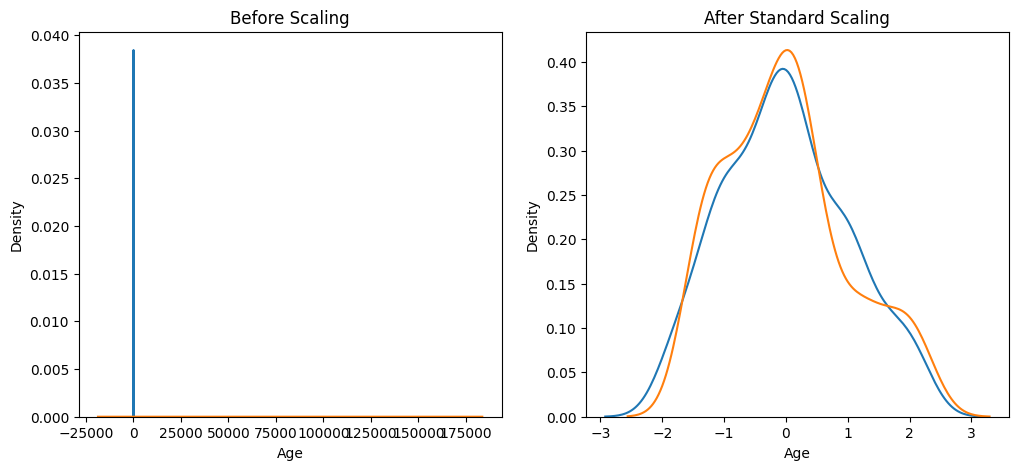

In [132]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# For First Column
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
#For Second Column
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

## There will be no chane in graph afer and before scaling as it only changes the range of x-axis but not the patterns, the pattern hidden remains the same

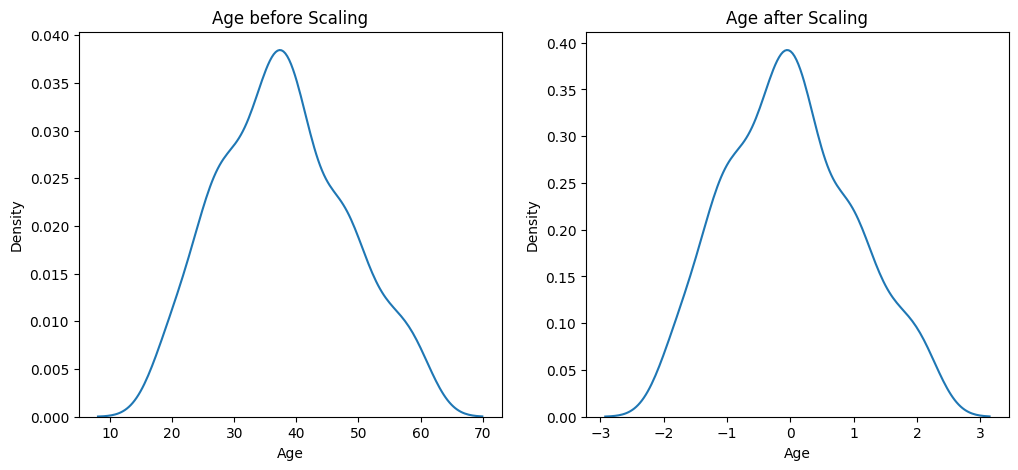

In [133]:
#No change in fig before and after scaling-no problem
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Age before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
#For second column
ax2.set_title("Age after Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
plt.show()

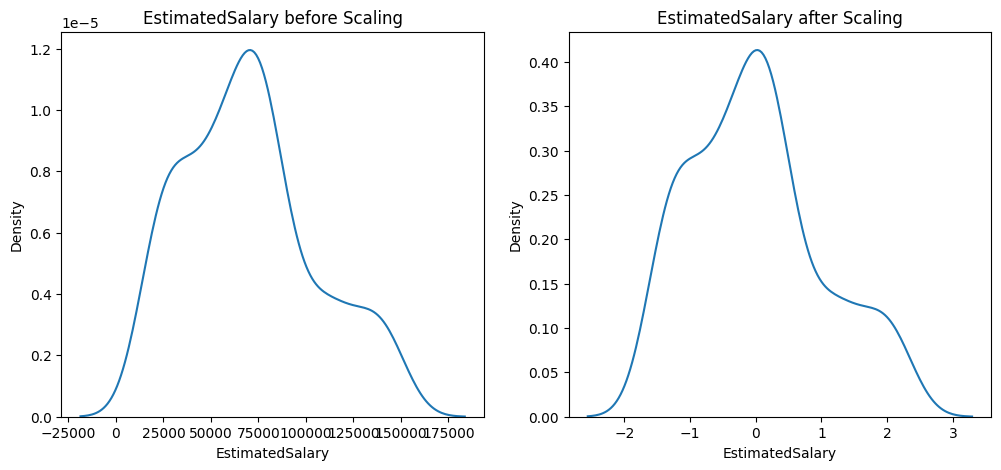

In [134]:
#No change in fig before and after scaling-no problem
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("EstimatedSalary before Scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)
#For second column
ax2.set_title("EstimatedSalary after Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

# Why Scaling is important

In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [136]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [137]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

## For testing the both sizes for correctness

In [138]:
print("y_test shape:", y_test.shape)
print("y_pred_scaled shape:", y_pred_scaled.shape)


y_test shape: (120,)
y_pred_scaled shape: (120,)


### For Calculating Metrics and evaluation

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


## The above output is not same for scaled an dnot scaled values. so for logistic regression model scaling is important

# Now we will see where Scaling is not Important (Decision Trees)

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [167]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [168]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

## Accuracy_score is already imported from metrics

In [169]:
print("Actual:",accuracy_score(y_test,y_pred))
print("Scaled:",accuracy_score(y_test,y_pred_scaled))

Actual: 0.8760330578512396
Scaled: 0.8760330578512396


In [146]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [147]:
df.shape


(400, 3)

## Add three outliers and observe their aspect in plot

In [148]:
df=pd.concat([df,pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[10000,250000,300000],"Purchased":[0,1,1]})],ignore_index=True)

In [149]:
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,10000,0
401,90,250000,1


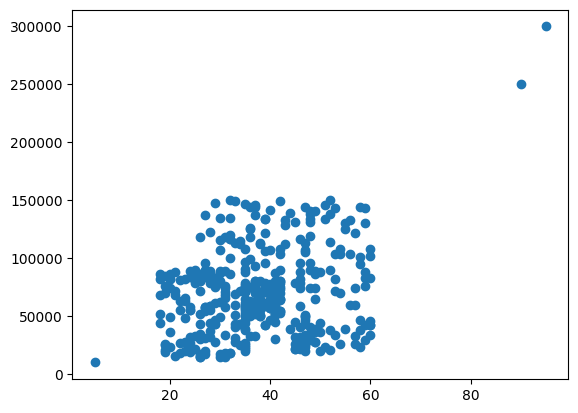

In [165]:
#plt.set_title("Before scaling & splitting with errors")
plt.scatter(df["Age"],df["EstimatedSalary"])

### Split the data

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(["Purchased"],axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [152]:
X_train.shape,X_test.shape

((282, 2), (121, 2))

### Scale the data

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [155]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [156]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [157]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [158]:
X_train_scaled.shape, X_test_scaled.shape

((282, 2), (121, 2))

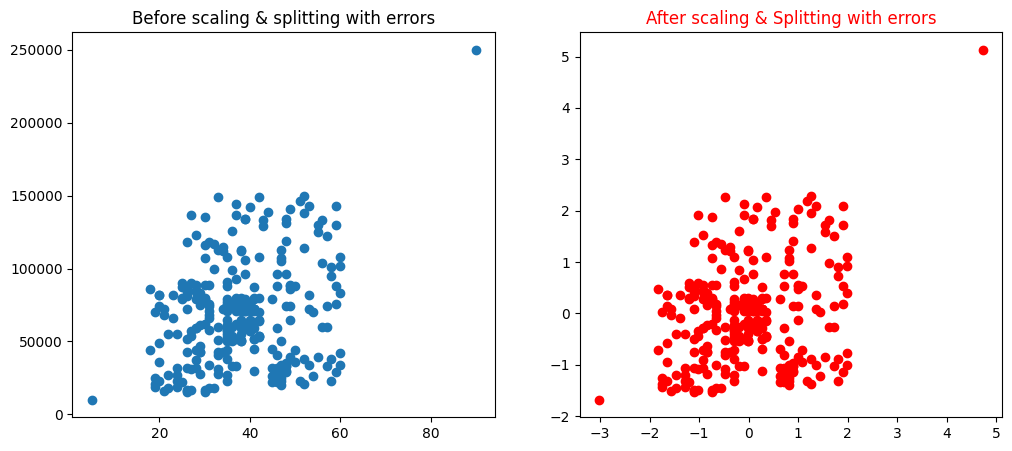

In [163]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling & splitting with errors")
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax2.set_title("After scaling & Splitting with errors",color="red")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color="red")
plt.show()